In [2]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

In [4]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

In [5]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [6]:
############# define run locations #############
short_locs = ['/home/jtindall/WatChMaL/outputs/2021-03-16/20-21-15/outputs'
              #'/home/jtindall/WatChMaL/outputs/2021-03-03/no_drop_last_full/outputs'
             ]

short_titles = ['Short Tank', 'Fitqun']

full_locs = []

full_titles = []

short_linecolor = [c[0] for _ in range(2)]
short_linestyle = ['--' for _ in range(2)]

full_linecolor = [c[1] for _ in full_locs]
full_linestyle = [':' for _ in full_locs]


In [7]:
#fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [8]:
locs = short_locs + full_locs
titles = short_titles + full_titles
linecolor = short_linecolor + full_linecolor
linestyle = short_linestyle + full_linestyle

In [9]:
############# load short tank run data #############
short_raw_output_softmax    = [np.load(loc + "/softmax.npy") for loc in short_locs]
short_raw_actual_labels     = [np.load(loc + "/labels.npy") for loc in short_locs]

In [10]:
# Verify outputs

In [11]:
idxs_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_3M_idxs.npz'
idxs = np.load(idxs_path, allow_pickle=True)

train_idxs = idxs['train_idxs']
val_idxs   = idxs['val_idxs']
test_idxs  = idxs['test_idxs']

In [12]:
## Load fitqun results

In [13]:
short_ids    = np.load('/home/jtindall/WatChMaL/outputs/2021-03-09/ordered_no_veto/outputs' + "/ids.npy")
short_labels = np.load('/home/jtindall/WatChMaL/outputs/2021-03-09/ordered_no_veto/outputs' + "/labels.npy")

In [14]:
print(short_labels)

[1 1 1 ... 0 0 0]


In [15]:
print()

In [16]:
def load_fq_output(mapping_indices_path, fq_failed_idxs_path, test_idxs_path, cut_path, cut_list):
    return -1

In [17]:
with open('./fq_comparison_data/3M_fitqun_mapping.pickle', 'rb') as handle:
    fq_mapping = pickle.load(handle)

gamma_fq_indices = fq_mapping['gamma_fq_indices']
e_fq_indices     = fq_mapping['e_fq_indices']
mu_fq_indices    = fq_mapping['mu_fq_indices']

In [18]:
# Retrieve flags
gamma_file_data = uproot.open('/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_gamma_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir.fiTQun.root')['fiTQun;1']
e_file_data     = uproot.open('/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_e-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir.fiTQun.root')['fiTQun;1']
mu_file_data    = uproot.open('/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_mu-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir.fiTQun.root')['fiTQun;1']

In [19]:
e_set_nll    = e_file_data.arrays('fq1rnll')['fq1rnll']

e_set_e_nll  = e_set_nll[:, 0, 1]
e_set_mu_nll = e_set_nll[:, 0, 2]

e_set_discriminator = np.array(e_set_mu_nll - e_set_e_nll)# / (e_set_mu_nll + e_set_e_nll)) #/ np.array(e_set_mu_nll + e_set_e_nll)

In [33]:
e_set_gamma_nll    = e_file_data.arrays('fq2elecnll')['fq2elecnll']
print(e_set_gamma_nll)

[5.36e+03, 1.28e+04, 3.79e+03, 8.27e+03, 1.31e+04, ... 1.46e+04, 597, 206, 6.9e+03]


In [19]:
print(len(e_set_discriminator[e_fq_indices]))

1177966


In [20]:
print(e_fq_indices)
print(gamma_fq_indices)
print(mu_fq_indices)

[      0       1       2 ... 1199995 1199996 1199999]
[      0       1       2 ... 1199997 1199998 1199999]
[      0       1       4 ... 1199997 1199998 1199999]


In [21]:
print(e_set_discriminator[e_fq_indices])

[  10.574707  558.58203    36.09204  ... 1419.4277    412.30664
  379.48828 ]


In [22]:
print(e_set_discriminator)

[ 10.574707 558.58203   36.09204  ...   0.        -9.158112 379.48828 ]


In [23]:
print(e_set_e_nll)

[5.27e+03, 1.27e+04, 3.79e+03, 8.29e+03, 1.3e+04, ... 1.49e+04, -47, 194, 7.68e+03]


In [24]:
print(e_set_mu_nll)

[5.28e+03, 1.33e+04, 3.83e+03, 8.47e+03, 1.42e+04, ... 1.53e+04, -47, 185, 8.06e+03]


In [25]:
print(len(set(e_set_discriminator)))

958212


In [22]:
gamma_set_nll    = gamma_file_data.arrays('fq1rnll')['fq1rnll']

gamma_set_e_nll  = gamma_set_nll[:, 0, 1]
gamma_set_mu_nll = gamma_set_nll[:, 0, 2]

gamma_set_discriminator = np.array(gamma_set_mu_nll - gamma_set_e_nll) #/ np.array(gamma_set_mu_nll + gamma_set_e_nll)

In [23]:
mu_set_nll    = mu_file_data.arrays('fq1rnll')['fq1rnll']

mu_set_e_nll  = mu_set_nll[:, 0, 1]
mu_set_mu_nll = mu_set_nll[:, 0, 2]

mu_set_discriminator = np.array(mu_set_mu_nll - mu_set_e_nll) #/ np.array(mu_set_mu_nll + mu_set_e_nll)

In [32]:
mu_set_gamma_nll    = mu_file_data.arrays('fq2elecnll')['fq2elecnll']
print(mu_set_gamma_nll)

KeyInFileError: not found: 'fq2elecnll'
in file /fast_scratch/WatChMaL/data/IWCD_mPMT_Short_mu-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir.fiTQun.root
in object /fiTQun;1

In [ ]:
gamma_set_gamma_nll    = gamma_file_data.arrays('fq2elecnll')['fq2elecnll']
print(gamma_set_gamma_nll)

In [28]:
fq_likelihoods = np.concatenate((e_set_discriminator[e_fq_indices],
                                 mu_set_discriminator[mu_fq_indices],
                                 gamma_set_discriminator[gamma_fq_indices]
                                ))

In [29]:
fq_labels = np.concatenate((np.ones_like(e_set_discriminator[e_fq_indices])*1,
                            np.ones_like(mu_set_discriminator[mu_fq_indices])*2,
                            np.ones_like(gamma_set_discriminator[gamma_fq_indices])*0
                            ))

In [30]:
print(short_raw_actual_labels[0][0:10])

[1 1 1 1 1 1 1 1 1 1]


In [31]:
print(short_raw_actual_labels[0][-10:])

[0 0 0 0 0 0 0 0 0 0]


In [32]:
fq_scores = np.zeros(short_raw_output_softmax[0].shape)
fq_scores[:, 1] = fq_likelihoods

In [33]:
short_raw_output_softmax = short_raw_output_softmax + [fq_scores]
short_raw_actual_labels  = short_raw_actual_labels + [fq_labels]

In [34]:
## Filter results

In [35]:
def remove_indices(array, cut_idxs):
    return np.delete(array, cut_idxs, 0)

In [36]:
with open('./fq_comparison_data/3M_fitqun_cuts.pickle', 'rb') as handle:
    cuts = pickle.load(handle)

cut_to_apply = np.concatenate((cuts['fq1rpcflg_1'], 
                               cuts['fq1rpcflg_2'],
                               cuts['mu_OD_veto'],
                               cuts['d_wall_cut'],
                               cuts['to_wall_cut'])) # cuts['fq_comparison_OD_veto']

In [37]:
short_raw_output_softmax = [remove_indices(softmax, cut_to_apply) for softmax in short_raw_output_softmax]
short_raw_actual_labels  = [remove_indices(labels, cut_to_apply) for labels in short_raw_actual_labels]

In [38]:
print(short_raw_actual_labels[0].shape)

(1584940,)


In [39]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

In [40]:
############# compute short collapsed ROC #############
short_collapsed_class_scores_list, short_collapsed_class_labels_list = multi_collapse_test_output(short_raw_output_softmax, short_raw_actual_labels, label_dict, ignore_type='$\gamma$')

short_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in short_collapsed_class_labels_list]
short_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in short_collapsed_class_scores_list]

In [41]:
short_fpr_list, short_tpr_list, short_thr_list = multi_compute_roc(short_collapsed_class_scores_list, short_collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"],
                            normalize=False)

In [42]:
print(len(short_fpr_list))

2


In [43]:
## Plot results

In [44]:
############# combine short and long results #############
fpr_list = short_fpr_list
tpr_list = short_tpr_list
thr_list = short_thr_list

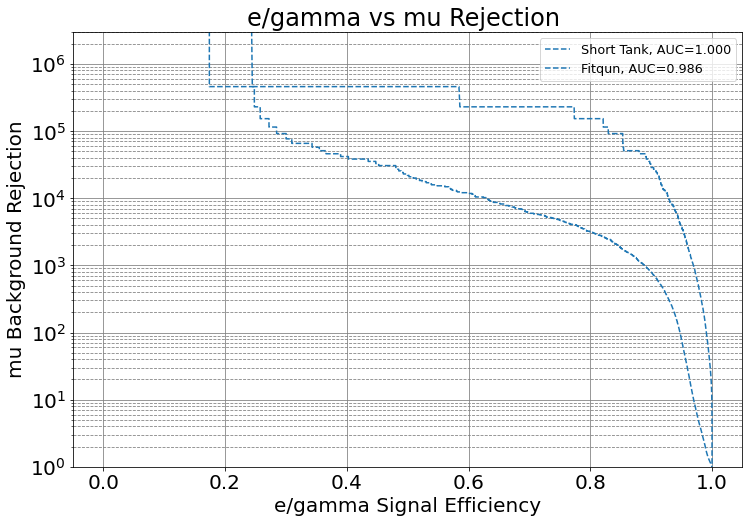

In [45]:
figs = multi_plot_roc(fpr_list, tpr_list, thr_list, "e/gamma", "mu", 
                      fig_list=[1], ylims=[[1,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)